ใน ep นี้ เราจะมาวิเคราะห์ Customer Segment สอนทฤษฎี การแบ่งกลุ่มลูกค้า Customer Segmentation หรือ Market Segmentation สร้าง Segment Profile กลุ่มลูกค้า, Customer Profile ด้วย K-Means Clustering ซึ่งเป็น Unsupervised Machine Learning Algorithm ที่เรียบง่าย และนิยมใช้ใงาน Customer Relationship Management, Business Model Canvas

# Customer Segmentation คืออะไร

Customer Segmentation หรือ Marketing Segmentation คือ การแบ่งกลุ่มลูกค้าเป็นกลุ่มย่อย ที่สมาชิกมีคุณลักษณะคล้าย ๆ กัน Customer Segmentation เป็นเครื่องมีอสำคัญ ที่นักการตลาดใช้ในการระบุความต้องการของกลุ่มลูกค้า ที่ถูกมองข้ามไป ยังไม่ได้รับการตอบสนอง การใช้ข้อมูลเหล่านี้ทำให้องค์กรธุรกิจสามารถเอาชนะคู่แข่ง ด้วยการพัฒนาสินค้า และบริการพิเศษ ที่ตอบสนองลูกค้าเฉพาะกลุ่ม

วิธีการยอดนิยม ที่ธุรกิจใช้ในการแบ่ง Segment กลุ่มลูกค้า คือ

- สถิติประชากร Demographic เช่น เพศ gender, อายุ age, ลักษณะของครอบครัว,กรรมพันธุ์ familial และสถานะสมรส marital status, รายได้ income, การศึกษา education, อาชีพ occupation.ฃ
- ข้อมูลภูมิศาสตร์ Geographical ที่มักแตกต่างกันใป ในแต่ละภาคธุรกิจ บางธุรกิจ อาจจะเน้นเฉพาะพื้นที่ หรือเมืองบางเมือง สำหรับธุรกิจขนาดใหญ่ อาจจะมองภาพรวมทั้งประเทศ หรือทวีป
- ลักษณะจิตวิทยา Psychographics เช่น ฐานะทางสังคม social class, ไลฟ์สไตล์ lifestyle, และ อุปนิสัย บุคลิกภาพ personality traits
- ข้อมูลพฤติกรรม Behavioral data เช่น การนิสัย พฤติกรรมการจับจ่ายใช้สอย การบริโภค spending and consumption habits, การใช้งานสินค้า และบริการ product/service usage, และประโยชน์ใช้สอยที่ได้รับ desired benefits.

# 0. Install

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

เราจะต้อง Install kaggle เพื่อ Download Dataset

In [0]:
# ! pip install kaggle --upgrade
# ! pip install plotly --upgrade

# 1. Import Library

Import Libray ที่เราต้องการใช้

In [0]:
import numpy as np 
import pandas as pd 
from pandas import plotting

import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')

import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected = True)

from sklearn.cluster import KMeans
import fastai

import warnings
import os
from pathlib import Path
warnings.filterwarnings("ignore")

# 2. เตรียม Path สำหรับดาวน์โหลดข้อมูล

กำหนด path ของ Config File และ Dataset ว่าจะอยู่ใน Google Drive ถ้าเราใช้ [Google Colab](https://www.bualabs.com/archives/1687/what-is-colab-open-jupyter-notebook-in-github-on-google-colab-create-open-in-colab-button-colab-ep-1/) หรือ อยู่ใน HOME ถ้าเราใช้ VM ธรรมดา และกำหนด Environment Variable ไปยังโฟลเดอร์ที่เก็บ kaggle.json

ในกรณีใช้ Colab ให้ Mount Google Drive เพื่อดึง Config File มาจาก Google Drive ส่วนตัวของเรา เมื่อเรารัน Cell ด้านล่างจะมีลิงค์ปรากฎขึ้นมาให้เรา Login กด Approve แล้ว Copy Authorization Code มาใส่ในช่องด้านล่าง แล้วกด Enter

In [0]:
dataset = 'vjchoudhary7/customer-segmentation-tutorial-in-python'

# Google Colab
config_path = Path('/content/drive')
data_path_base = Path('/content/datasets/')

data_path = data_path_base/dataset

from google.colab import drive
drive.mount(str(config_path))
os.environ['KAGGLE_CONFIG_DIR'] = f"{config_path}/My Drive/.kaggle"

# # VM
# config_path = Path(os.getenv("HOME"))
# data_path = config_path/"datasets"/dataset

# data_path.mkdir(parents=True, exist_ok=True)
# os.environ['KAGGLE_CONFIG_DIR'] = f"{config_path}/.kaggle"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 3. Dataset

ในเคสนี้ เราจะ Download ข้อมูล Dataset ที่เกี่ยวข้องทั้งหมดมาเก็บไว้ ซึ่งเป็นไฟลื CSV 

Dataset เราจะดึงจาก Kaggle วิธี Download kaggle.json ให้ดูจาก ep ที่แล้ว

เมื่อได้ kaggle.json มาแล้ว ในกรณีใช้ Google Colab ให้นำมาใส่ไว้ในโฟลเดอร์ My Drive/.kaggle ใน Google Drive ของเรา เป็น My Drive/.kaggle/kaggle.json ถ้าใช้ VM ให้ใส่ใน HOME/.kaggle/

สั่งดาวน์โหลด Dataset จาก Kaggle พร้อมทั้ง unzip ไว้ใน data_path

In [0]:
!kaggle datasets download {dataset} -p "{data_path}" --unzip

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 2.36MB/s]


ls ใน path ดูรายการไฟล์ที่ได้มา

In [0]:
!ls {data_path}

Mall_Customers.csv


# 4. Data

## 4.1 Exploratory Data Analysis 

โหลดไฟล์ CSV ขึ้นมาใส่ Pandas Dataframe แล้วลอง[วิเคราะห์สำรวจข้อมูล Exploratory Data Analysis](https://www.bualabs.com/archives/2297/exploratory-data-analysis-eda-pandas-profiling-pandas-dataframe-pandas-ep-6/) มี 200 Row 5 Column

In [0]:
df =  pd.read_csv(data_path/'Mall_Customers.csv')
df.shape

(200, 5)

ดูข้อมูลตัวอย่าง 5 แถวแรก

In [0]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


ดูสถิติข้อมูล

In [0]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


ดูชนิดข้อมูล เป็นตัวเลข ยกเว้น Gender ที่เป็น Object (String)

In [0]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

เคสนี้ไม่มีข้อมูลขาดหาย ไม่ต้องทำ [Fillna](https://www.bualabs.com/archives/2085/what-is-preprocessing-handle-missing-value-fill-na-null-nan-before-feedforward-machine-learning-preprocessing-ep-1/)

In [0]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 4.2 Visualization

### ดู Histogram ของทั้ง 3 Column ที่เป็นตัวเลข

ดูการการะจายข้อมูลของทั้ง 3 Column

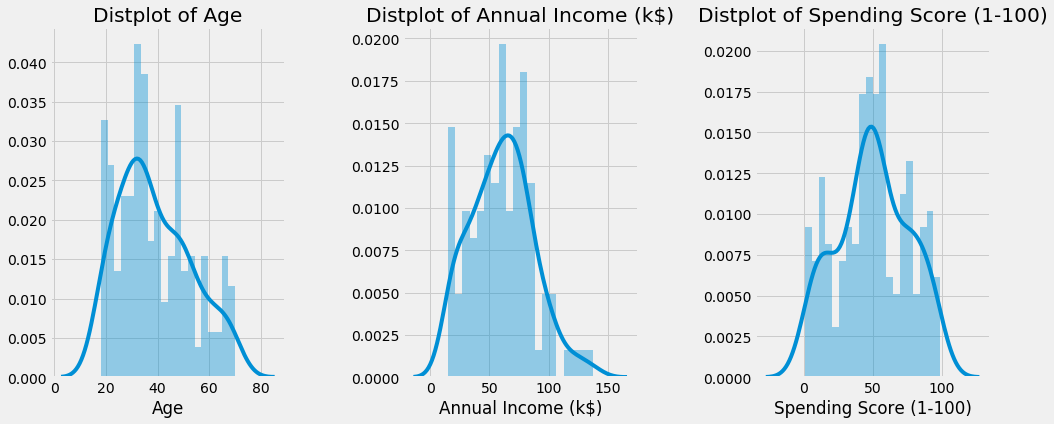

In [0]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### สัดส่วน แต่ละเพศ

นับจำนวนตัวอย่างข้อมูล แยก Gender

In [0]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
size

Female    112
Male       88
Name: Gender, dtype: int64

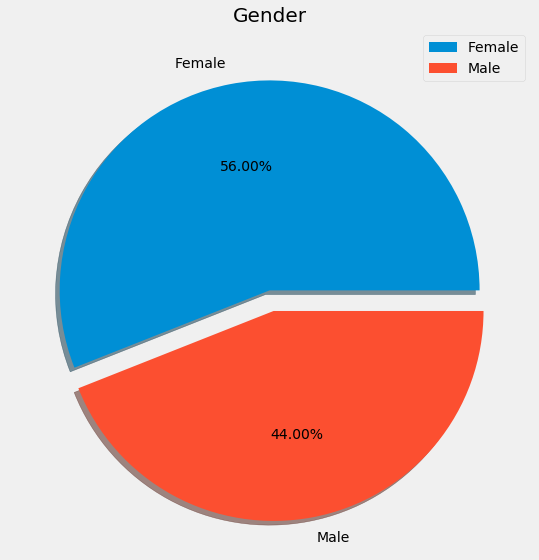

In [0]:
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

### Andrew Curves

Andrew Curves เมื่อคำนึงถึง เพศ Gender

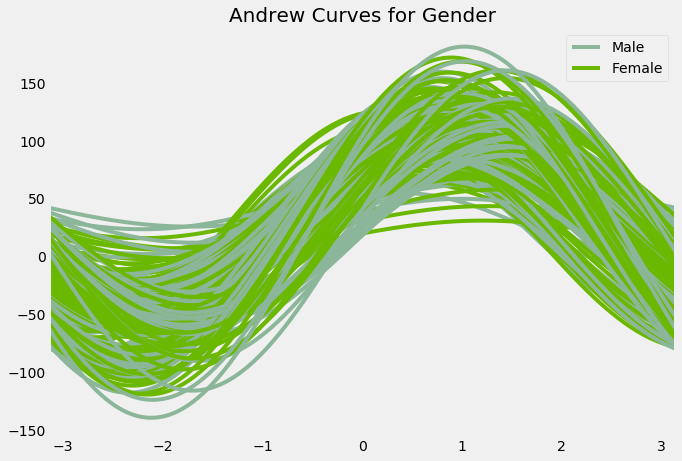

In [0]:
plt.rcParams['figure.figsize'] = (10, 7)

plotting.andrews_curves(df.drop("CustomerID", axis=1), "Gender")
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

### พล็อตกราฟความสัมพันธ์ ระหว่าง Age, Annual Income, Spending Score

พล็อตข้อมูล และ fit ด้วย Linear Regression โดยยังไม่สนใจเพศ Gender

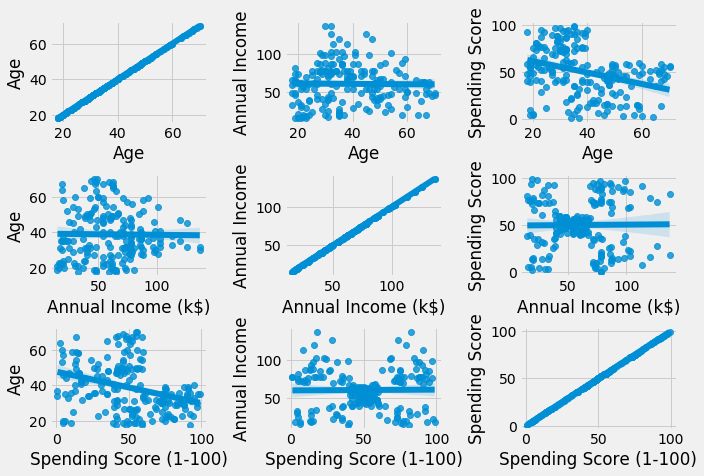

In [0]:
plt.figure(1 , figsize = (10 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

### Pairplot Age, Annual Income, Spending Score w.r.t Gender

แสดงความสัมพันธ์ Age, Annual Income, Spending Score เมื่อคำนึงถึง เพศ Gender

Text(0.5, 1.08, 'Pairplot for the Data')

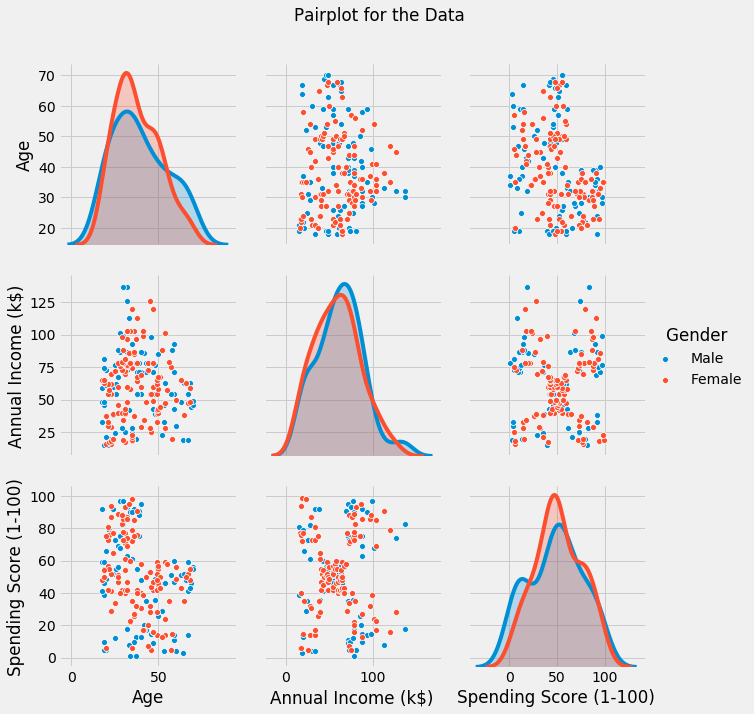

In [0]:
g = sns.pairplot(df.drop("CustomerID", axis=1), hue="Gender", height=3)
g.fig.suptitle("Pairplot for the Data", y=1.08) # y= some height>1

### Scatter Plot Age vs Annual Income with respect to Gender

พล็อตความสัมพันธ์ของ อายุ และรายได้ต่อปี เมื่อคำนึงถึง เพศ Gender

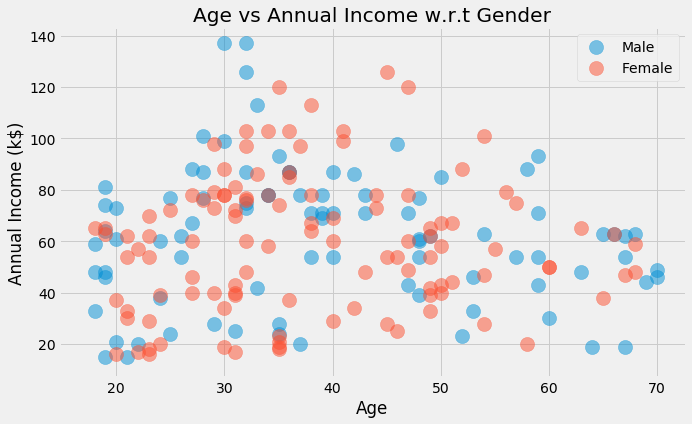

In [0]:
plt.figure(1 , figsize = (10 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

### Scatter Annual Income vs Spending Score with respect to Gender

พล็อตความสัมพันธ์ของ รายได้ต่อปี กับ คะแนนการใช้จ่าย เมื่อคำนึงถึง เพศ Gender

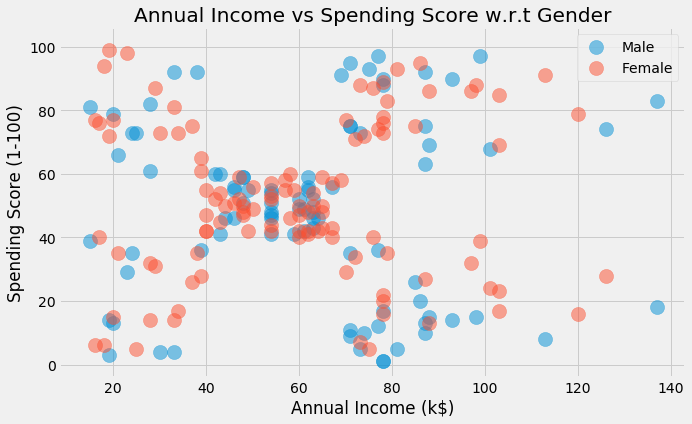

In [0]:
plt.figure(1 , figsize = (10 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

### Distribution of Age , Annual Income and Spending Score according to Gender

ดูการกระจายของ Age, Annual Income และ Spending Score แยกแต่ละเพศ Gender

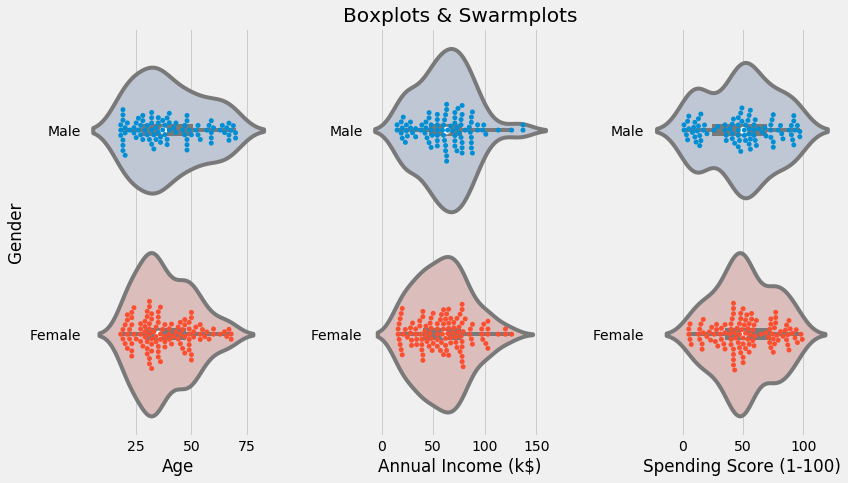

In [0]:
plt.figure(1 , figsize = (12 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

### Heatmap ของ Correlation ของ columns Age , Annual Income and Spending Score according to Gender

ดูการกระจายของ Age, Annual Income และ Spending Score แยกแต่ละเพศ Gender

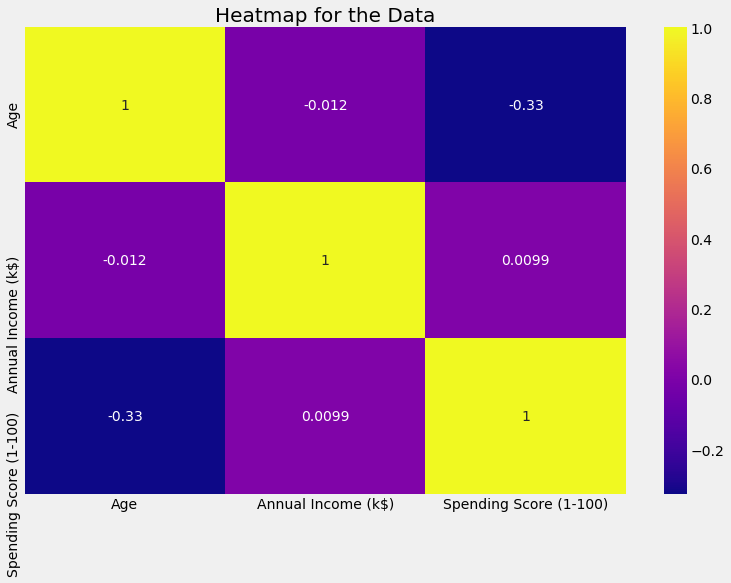

In [0]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(df.drop("CustomerID", axis=1).corr(), cmap = 'plasma', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

# 5. Customer Segmentation ด้วย K-means Clustering

เราจะใช้ K-Means Clustering Algorithm ในการแบ่งกลุ่มลูกค้า โดย K เป็น Hyperparameter ที่เราจะต้องกำหนด

## 5.1 Customer Segmentation ด้วย Age และ Spending Score

เพื่อความง่าย เราจะใช้แค่ 2 Column Age และ Spending Score ก่อน

แล้วจะเลือกใช้ K เท่าไรดี หมายถึงแบ่งลูกค้าเป็นกี่กลุ่มดี ถึงจะเหมาะสม เราจะใช้วิธีลองแบ่งกลุ่มไล่ไป ตั้งแต่ 1-11 กลุ่ม แล้วหา Within-cluster Sum of Squared Errors (WSS) หรือ Inertia ของ K นั้น ๆ มาพล็อตกราฟดูแนวโน้ม

Within-cluster Sum of Squared Errors (WSS) คือ ผลรวมของ ระยะระหว่างจุดข้อมูล กับ Centroid ที่อยู่ใน Cluster เดียวกัน ยกกำลังสอง คล้าย ๆ กับ [Mean Squared Error](https://www.bualabs.com/archives/1928/what-is-mean-absolute-error-mae-mean-squared-error-mse-root-mean-squared-error-rmse-loss-function-ep-2/)

In [0]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

เราจะต้องชั่งน้ำหนัก ระหว่างเลือกแบ่งกลุ่มให้น้อยที่สุด หมายถึง K น้อยที่สุด ที่ให้ Inertia น้อยที่สุด

วิธีการก็คือ ให้สังเกตที่ข้อศอก Elbow ที่กราฟหักเยอะที่สุด คือคุ้มสุด เพิ่ม K อีก 1 แต่ลด Inertia ได้เยอะ ในเคสนี้ จะเท่ากับ 4

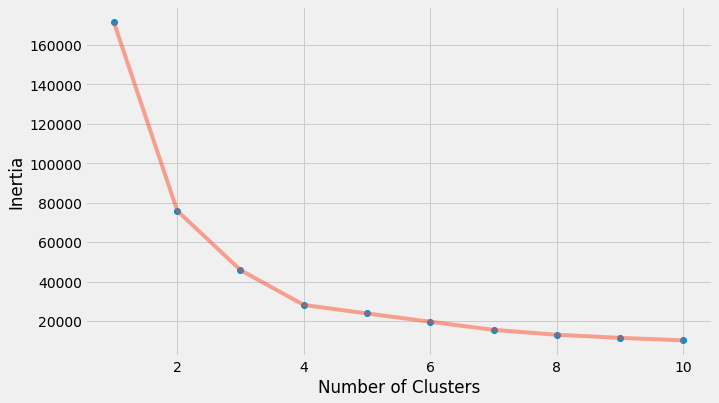

In [0]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

เมื่อได้ K = 4 มาแล้ว ก็นำมาสร้าง K-Means Clustering แบ่งข้อมูลเป็น 4 ส่วน พร้อมหา Label และ Centroid ของทั้ง 4 กลุ่ม Cluster

In [0]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [0]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

ถมสีพื้นที่แต่ละ Cluster วาดจุดข้อมูลสีต่าง ๆ ตาม Cluster และ วาดจุดแดง ในตำแหน่งของ Centroid ของแต่ละ Cluster

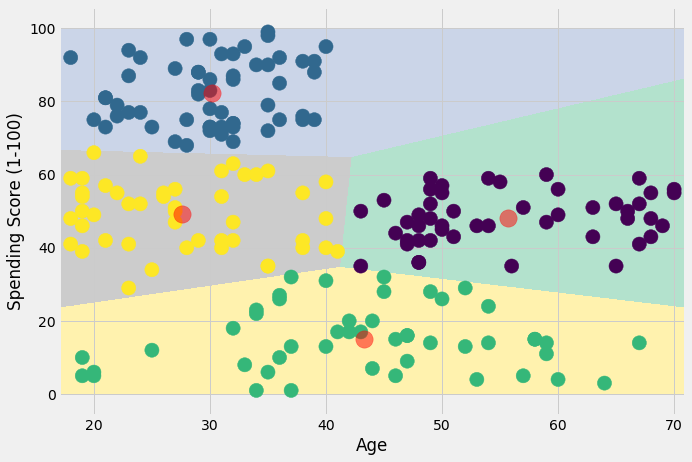

In [0]:
plt.figure(1 , figsize = (10 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 , cmap = 'viridis')
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

## 5.2 Customer Segmentation ด้วย Annual Income และ Spending Score

ต่อมา เราจะใช้ 2 Column เหมือนเดิม คือ Annual Income และ Spending Score 

In [0]:
'''Annual Income (k$) and spending Score'''
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

ตำแหน่ง Elbow เปลี่ยนเป็น 5 หมายถึง K=5 คราวนี้ เราจะสร้าง 5 Cluster

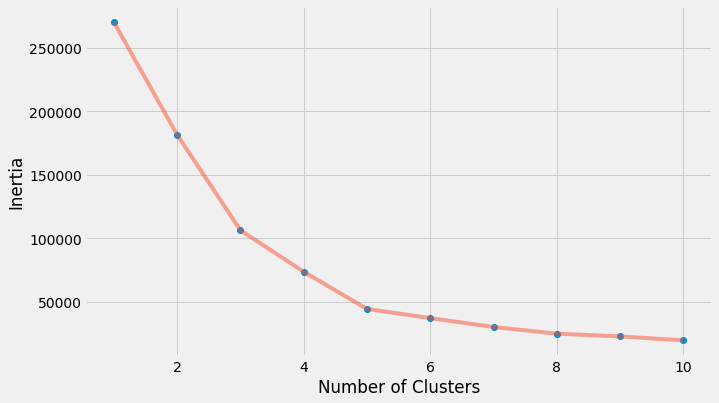

In [0]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [0]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [0]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

พล็อต 5 Cluster

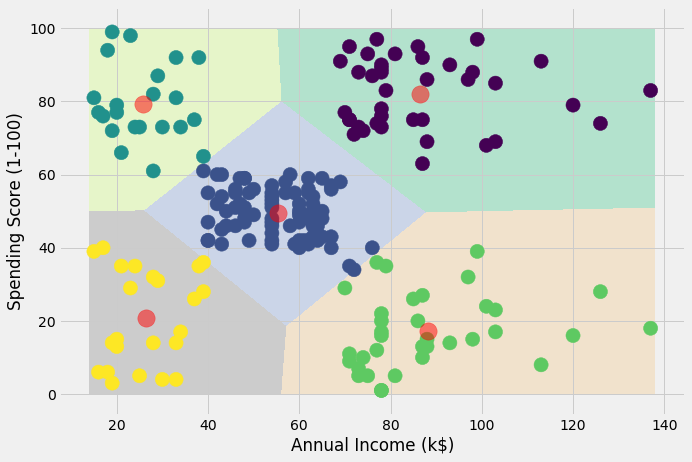

In [0]:
plt.figure(1 , figsize = (10 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 , cmap = 'viridis')
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

## 5.3 Customer Segmentation ด้วย Age , Annual Income และ Spending Score

แล้วถ้าเป็น 3 Column เราก็ทำเหมือนเดิม แต่เวลาพล้อตกราฟ จะออกมาเป็นกราฟ 3 มิติ (3D)

In [0]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

ได้ K=6

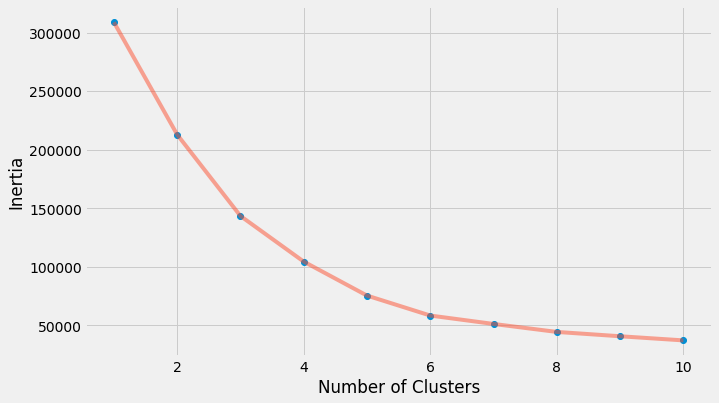

In [0]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [0]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [0]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers', 
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    width=640,
    height=640,
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)

ประกาศฟังก์ชัน สำหรับช่วยแสดงกราฟ plotly 3 มิติใน Colab

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
  '''))

แสดงกราฟ 3 มิติ สามารถเลื่อน, หมุน และ Zoom เข้าออกได้

In [0]:
configure_plotly_browser_state()
py.offline.iplot(fig)

# 6. ตีความ Interpretation

1. กลุ่มแรก สีม่วง รายได้สูง จ่ายหนัก อายุไม่มาก
1. กลุ่มสอง สีม่วงแดง รายได้สูง จ่ายน้อย
1. กลุ่มสาม สีน้ำเงิน รายได้กลาง จ่ายกลาง อายุมาก
1. กลุ่มสี่ สีเหลือง รายได้กลาง จ่ายกลาง อายุน้อย
1. กลุ่มห้า สีส้ม รายได้น้อย จ่ายน้อย
1. กลุ่มหก สีแดง รายได้น้อย จ่ายหนัก อายุน้อย

เราสามารถสร้างระบบแจ้งข่าวพิเศษ บริการ Gold Member ให้กับ กลุ่มแรกสีม่วงให้ทราบถึงสินค้าใหม่ล่าสุด เกรดดีที่สุด ที่เหมาะสำหรับคนรุ่นใหม่ และจัดโปรโมชั่นเงินผ่อน 0% ให้สำหรับสินค้าแฟชั่นวัยรุ่น เพื่อ กลุ่มหก สีแดง เป็นต้น

# 7. สรุป

1. เราได้ทำ [Exploratory Data Analysis](https://www.bualabs.com/archives/2297/exploratory-data-analysis-eda-pandas-profiling-pandas-dataframe-pandas-ep-6/) สำรวจวิเคราะห์ ทำความเข้าใจ ข้อมูล ชุดข้อมูลลูกค้าตัวอย่าง ที่ไม่ซับซ้อน มีแค่ 5 Column 
1. เราได้แบ่งกลุ่มลูกค้า โดยใช้ชุดข้อมูลตัวอย่าง ด้วย K-Means Clustering และ ได้เรียนรู้วิธีการเลือก [Hyperparameter](https://www.bualabs.com/archives/618/learning-rate-deep-learning-how-to-hyperparameter-tuning-ep-1/) K ที่เหมาะสม
1. เราสามารถนำความรู้นี้ ไปประยุต์ใช้กับชุดข้อมูลที่ซับซ้อนยิ่งขึ้น มี[หลายตาราง](https://www.bualabs.com/archives/958/machine-learning-deep-learning-structure-data-tabular-data-ep-1/) เชื่อมโยงกัน ไม่ว่าจะเป็นข้อมูลลูกค้า, สาขา, ยอดขาย, Feature Engineering ต่าง ๆ, พฤติกรรมต่าง ๆ ไปจนถึง ข้อมูล [Time-Series](https://www.bualabs.com/archives/1574/time-series-analysis-rossmann-store-sales-machine-learning-time-series-forecasting-deep-neural-networks-tabular-data-ep-3/) เป็นต้น
1. เราได้ Plot การจับกลุ่มของลูกค้า เป็นกราฟ 2-3 มิติ ให้เห็นภาพ เพื่อสื่อสารให้เข้าใจมากขึ้น ซึ่งถ้ามีข้อมูลที่ซับซ้อนขึ้น เราสามารถประยุกต์ใช้ร่วมกับเทคนิค Dimensionality Reduction เช่น PCA, [T-SNE](https://www.bualabs.com/archives/996/visualization-embedding-deep-learning-model-deep-neural-networks-tensorboard-ep-2/)

# Credit

- https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3
- https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
- https://www.kaggle.com/kushal1996/customer-segmentation-k-means-analysis
- https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis
- https://www.kaggle.com/vjchoudhary7/kmeans-clustering-in-customer-segmentation
- https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory